In [1]:
import pandas as pd
from neo4j import GraphDatabase
from graphdatascience import GraphDataScience



In [2]:
graph_db =  GraphDatabase.driver(uri = "bolt://localhost:7687", auth=("neo4j", "password"))

In [3]:
URI  = "bolt://localhost:7687"
creds=("neo4j", "password")

gds =  GraphDataScience(URI,auth=(creds ))


In [12]:
result = gds.run_cypher(
  """
CALL gds.graph.project('myGraph','*','*')
  """
)
display(result)

,nodeProjection,relationshipProjection,graphName,nodeCount,relationshipCount,projectMillis
0,"{'__ALL__': {'label': '*', 'properties': {}}}","{'__ALL__': {'orientation': 'NATURAL', 'aggreg...",myGraph,61,100,8


In [11]:
result = gds.run_cypher(
  """
    CALL gds.graph.drop('myGraph')
  """
)
display(result)

,graphName,database,memoryUsage,sizeInBytes,nodeCount,relationshipCount,configuration,density,creationTime,modificationTime,schema
0,myGraph,neo4j,,-1,61,100,{},0.027322,2022-11-09T10:16:43.378544400+01:00,2022-11-09T10:16:43.389524700+01:00,"{'graphProperties': {}, 'relationships': {'__A..."


In [13]:

result = gds.run_cypher(
  """
    CALL gds.graph.list()
  """
)
display(result)

,degreeDistribution,graphName,database,memoryUsage,sizeInBytes,nodeCount,relationshipCount,configuration,density,creationTime,modificationTime,schema
0,"{'p99': 6, 'min': 0, 'max': 9, 'mean': 1.63934...",myGraph,neo4j,298 KiB,305736,61,100,{'relationshipProjection': {'__ALL__': {'orien...,0.027322,2022-11-09T12:27:14.022447300+01:00,2022-11-09T12:27:14.029449500+01:00,"{'graphProperties': {}, 'relationships': {'__A..."


In [48]:
result = gds.run_cypher(
  """
CALL gds.nodeSimilarity.write.estimate('myGraph', {
  writeRelationshipType: 'SIMILAR',
  writeProperty: 'score'
})
YIELD nodeCount, relationshipCount, bytesMin, bytesMax, requiredMemory
  """
)
display(result)


,nodeCount,relationshipCount,bytesMin,bytesMax,requiredMemory
0,61,235,20104,23032,[19 KiB ... 22 KiB]


,Jämför_node_1,jämför_node_2,similarity
0,T106,T107,0.777778
1,T106,T108,0.777778
2,T106,T109,0.777778
3,T106,T114,0.777778
4,T106,T115,0.777778
...,...,...,...
335,From_air,Kontor,0.052632
336,Box1,Kontor,0.050000
337,F103,Kontor,0.050000
338,K3,Kontor,0.045455


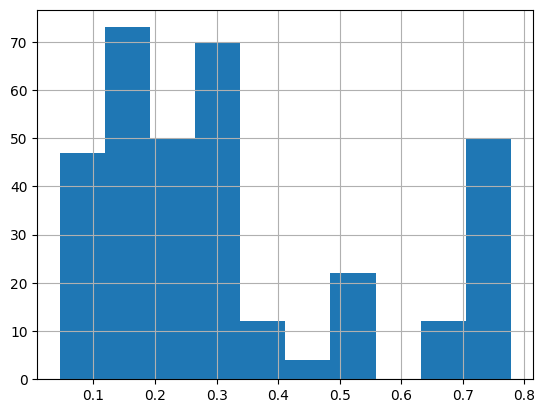

In [47]:
result = gds.run_cypher(
  """
CALL gds.nodeSimilarity.stream('myGraph')
YIELD node1, node2, similarity
RETURN gds.util.asNode(node1).name AS Jämför_node_1, gds.util.asNode(node2).name AS jämför_node_2, similarity
ORDER BY similarity DESCENDING, Jämför_node_1, jämför_node_2
  """
)
likhet=result['similarity']




result['similarity'].hist()

result